<h2><center>Η συμβολή της Διεσπαρμένης Παραγωγής στη ρύθμιση τάσης</center></h2>


Τα  σύγχρονα  συστήματα  διανομής  έχουν  σχεδιαστεί  για  διανέμουν το ρεύμα στους καταναλωτές, με  τη ροή της  πραγματικής και  της  άεργου  ισχύος να είναι  πάντα  από  το υψηλότερο προς στο  χαμηλότερο  επίπεδο  τάσης. Ωστόσο,  με τη σημαντική  διείσδυση  της Διεσπαρμένης Παραγωγής (ΔΠ), η ροή της ισχύος μπορεί να αντιστραφεί με αποτέλεσμα την ανύψωση τάσης. Έτσι, σε ορισμένες περιπτώσεις (όταν το φορτίο είναι χαμηλό και η παραγωγή από ΔΠ υψηλή) η τάση μπορεί να ξεπεράσει το  ανώτατο  όριο.


<div>
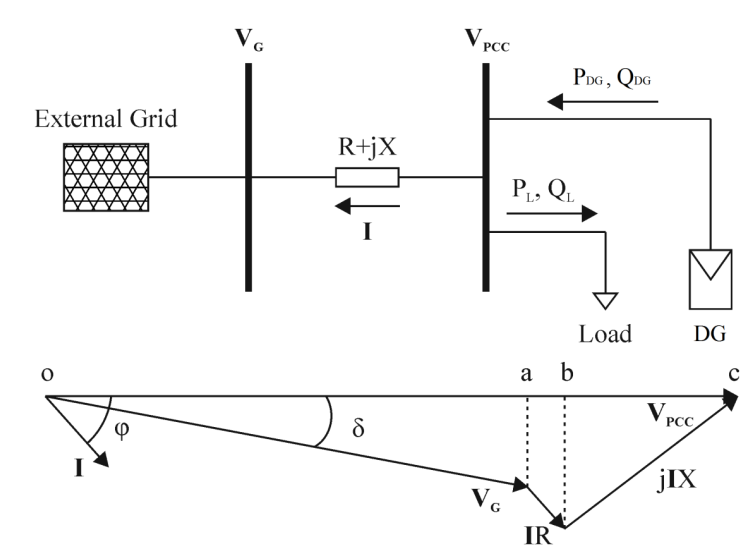
</div>

<center> Σχήμα 1: Μονάδα ΔΠ και φορτίο συνδέονται στο ανάντη δίκτυο μέσω γραμμής διανομής (άνω), και το αντίστοιχο διανυσματικό διάγραμμα (κάτω)</center>

Στο Σχήμα 1 φαίνεται το φορτίο με ενεργό και άεργο ισχύ ($P_L$ , $Q_L$) και η μονάδα ΔΠ με ενεργό και άεργο ισχύ ($P_{DG}$ , $Q_{DG}$) που συνδέονται στο ανάντη δίκτυο μέσω γραμμής ωμικής αντίστασης $R$ και επαγωγικής αντίδρασης $X$.

$V_G$ είναι η τάση του δικτύου και $V_{PCC}$ η τάση του ζυγού φορτίου.

$P_{PCC}$ και $Q_{PCC}$ είναι η συνολική ενεργός και άεργος ισχύς που ρέει από τον ζυγό φορτίου.

Στην παρακάτω προσομοίωση θα μελετήσουμε το φαινόμενο της ανύψωσης τάσης. 

* Θα δούμε ότι η έγχυση ενεργού ισχύος από μια μονάδα ΔΠ ($P_{DG}$) στο δίκτυο μπορεί να προκαλέσει την αύξηση της τάσης στο σημείο σύνδεσης της μονάδας ΔΠ. 
* Η έγχυση άεργου ισχύος από τη μονάδα ΔΠ, μέσω της αύξησης του συντελεστή ισχύος ($\cosφ$) αυξάνει περαιτέρω την τάση ενώ αντίθετα, η απορρόφηση άεργου ισχύος, μέσω της μείωσης του $\cosφ$ βοηθάει στη μείωση της τάσης που αυξήθηκε από την έγχυση ενεργού ισχύος της μονάδας.

Στο παρακάτω τμήμα κώδικα δηλώνονται οι απαραίτητες βιβλιοθήκες της Python για την εκτέλεση του πειράματος και ορίζονται οι μεταβλητές.
* $R= 2.35Ω$, $Χ = 1.71Ω$, $P_L= 300kW$
* Η τάση του δικτύου θεωρείται ότι έχει την ονομαστική της τιμή $V_{G}= 230kV$
* Η μονάδα ΔΠ θεωρείται ότι λειτουργεί με μοναδιαίο ΣΙ άρα $Q_{DG}= 0$

In [ ]:
# Enable inline plotting
%matplotlib inline 

# Imports
import matplotlib.pylab as plt
import pandas
import math

import numpy as np
import time
import pylab as pl
from IPython import display

import matplotlib.dates as md
from datetime import datetime
import datetime as dt

import threading

import ipywidgets as widgets
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

from IPython.display import clear_output
from IPython.display import display

from ipywidgets import interactive, interactive_output
from ipywidgets import HBox

global Pdg
global Qdg
global Pl
global Ql
global Ppcc
global Qpcc

R = 2.35  
X = 1.71
Vg = 230 
Pl = 300
Qdg = 0


Το παρακάτω τμήμα κώδικα δημιουργεί και εμφανίζει δύο διαδραστικά στοιχεία εισόδου χρήστη για την χειροκίνητη ρύθμιση των τιμών της ενεργού ισχύος της μονάδας ΔΠ ($P_{DG}$) και του συντελεστή ισχύος ($\cosφ$). Μέσα σε ένα while loop υπολογίζονται κάθε στιγμή οι τιμές των $V_{PCC}$,$P_{PCC}$ και $Q_{PCC}$ από τις παρακάτω σχέσεις και οι αυξομοιώσεις τους παρουσιάζονται σε τρεις γραφικές παραστάσεις σε συνάρτηση με τον χρόνο. 

Η γωνία $φ$ υπολογίζεται από τη σχέση:

$$φ= \cos^{-1}φ  \quad (1) $$

H ενεργός και άεργος ισχύς της μονάδας ΔΠ δίνεται από τις σχέσεις:

$$P_{PCC} = P_{DG}- P_L \quad (2) $$

$$Q_{PCC} = Q_{DG}- Q_L \quad (3) $$

Επίσης ισχύουν:

$$P_{PCC} = V_{PCC}\cdot I \cdot \cosφ \quad (4) $$

$$Q_{PCC} = V_{PCC}\cdot I \cdot \sinφ \quad (5) $$

Επομένως: 

$$Q_{PCC} = P_{PCC}\cdot \tanφ \quad (6) $$

H μεταβολή της τάσης υπολογίζεται προσεγγιστικά ως:

$$ΔV \approx \frac{P_{PCC}\cdot R + Q_{PCC}\cdot Χ}{V_{PCC}}\approx \frac{P_{PCC}\cdot R + Q_{PCC}\cdot Χ}{V_{G}}  \quad (7)$$

Και από τη σχέση $(8)$ υπολογίζεται η τάση του ζυγού φορτίου:

$$ΔV = V_{PCC} - V_{G} \Rightarrow  V_{PCC}= ΔV + V_{G} \quad (8)$$ 


In [ ]:
w = widgets.IntSlider(value=290, description='Pdg', min=200,max=400,step=10)
pf = FloatSlider(value=0.85, description='cosφ', min=0.8,max=1,step=0.01)

ui = widgets.HBox([w, pf])

def f(w, pf):
    display((w, pf))

out = widgets.interactive_output(f, {'w': w, 'pf': pf})

display(ui, out)

def on_value_change_Pdg(change):
    Pdg = change['new']
    
def on_value_change_pf(change):
    pf = change['new']
            
w.observe(on_value_change_Pdg, names='value')
pf.observe(on_value_change_pf, names='value')    
        
def plot(stime,stemp,stemp1,stemp2):   
    f, axarr = plt.subplots(3, sharex=True, figsize=(7,7))
    axarr[0].step(stime,stemp)
    axarr[0].set_ylim(229.5, 230.5)
    
    axarr[1].step(stime,stemp1,'r')
    axarr[1].set_ylim(-100,100)
    
    axarr[2].step(stime,stemp2,'g')
    axarr[2].set_ylim(-50,50)

    axarr[0].set_ylabel("Vpcc(KV)")
    axarr[1].set_ylabel("Ppcc(KW)")
    axarr[2].set_ylabel("Qpcc(Kar)")
    
    axarr[2].set_xlabel("Time")
    
    axarr[0].set_title("Voltage")
    axarr[1].set_title("Active Power")
    axarr[2].set_title("Reactive Power")
    
    clear_output(wait=True)
    display(plt.gcf())
    plt.gcf().clear()
    time.sleep(2)
    
    
def train():
    stime = np.array([])  
    stemp = np.array([])
    stemp1 = np.array([])
    stemp2 = np.array([])
    
    while True:
        try:   
            φ = math.acos(pf.value)   # (1)
            Pdg = w.value
            Ppcc = Pdg - Pl           # (2)
            Qpcc = Ppcc*math.tan(φ)   # (6)
            ΔV = (Ppcc*R + Qpcc*X)/Vg # (7)
            Vpcc = Vg + ΔV            # (8)   
            newTime = datetime.now()
            temp = Vpcc
            stime = np.append(stime,newTime)    # Store the values
            stemp = np.append(stemp,temp)
            stemp1 = np.append(stemp1,Ppcc)
            stemp2 = np.append(stemp2,Qpcc)
            plot(stime,stemp,stemp1,stemp2)
            
        except KeyboardInterrupt:
            break  

try:
    thread = threading.Thread(target=train, args=())
    thread.start()
except:
    print("error")